In [11]:
# !pip install scanpy
import os
import numpy as np
import pandas as pd
import time
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as K
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
import model

In [13]:
# os.listdir('../DATA/')

In [14]:
gex_input_df=pd.read_csv('../DATA/gex_input_824_hvf.csv.gz').set_index('Unnamed: 0')
print(gex_input_df.shape)
gex_data = gex_input_df
# gex_tensor = tf.convert_to_tensor(gex_data, dtype=tf.float32)

(5220, 824)


In [21]:
atac_input_df=pd.read_csv('../DATA/atac_input_3024_hvf.csv.gz').set_index('Unnamed: 0')
print(atac_input_df.shape)
atac_data = atac_input_df

(5220, 3024)


In [23]:
for step,batch in enumerate(gex_data):
    print(step)
    break

0


In [24]:
batch

'CD2'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(gex_data, gex_data, test_size=0.2, random_state=42,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4176, 824)
(1044, 824)
(4176, 824)
(1044, 824)


In [26]:
X_train

,CD2,BCL11A,PLAG1,SLC24A4,MGAT4A,ITM2A,ANXA1,TNFSF13B,TIAM1,YPEL1,...,KLRG1,AC139720.1,HLA-DPB1,PPM1L,RAB11FIP1,CSF2RA,ADAM28,NEAT1,TBC1D4,LEF1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AGGTTAGAGCATGAAG-1,1.113584,-0.399262,-0.247881,-0.185028,-0.736633,-0.352862,0.470520,-0.378872,-0.463676,-0.268768,...,-0.430789,-0.472180,-0.642098,-0.340579,-0.606041,-0.270760,-0.402460,-1.357663,-0.337139,-0.966032
CGAATATGTTTATCTG-1,-0.862723,-0.263113,-0.191096,-0.453300,-0.815262,-0.458687,-0.865424,-0.459459,1.694116,-0.241920,...,-0.442877,-0.719484,-0.342177,-0.362873,-0.758795,-0.340960,-0.183213,-1.582240,-0.440446,-1.106136
AAGCTAGAGCCTGATG-1,1.404879,-0.316811,-0.291384,0.008488,-0.881196,-0.422944,-0.386494,-0.034010,2.110918,-0.309825,...,-0.527305,2.620933,1.731413,-0.133861,1.709566,0.054800,-0.447662,-0.919493,-0.274315,1.017033
GATAACGAGTAGCGCC-1,-0.769148,-0.338789,-0.208775,-0.367639,-0.754277,-0.398797,2.538502,-0.484837,-0.548274,-0.246627,...,-0.420259,-0.584895,-0.512755,-0.389735,1.466498,-0.367549,-0.273354,1.173930,-0.405375,-0.996649
AGTTACATCCTAAGAC-1,1.104595,-0.374637,-0.216084,-0.331929,1.105400,-0.370345,1.289747,-0.502240,-0.542196,-0.248073,...,-0.408325,1.415481,-0.593855,-0.405471,-0.761963,-0.385177,-0.313620,0.373052,-0.390476,0.228890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGAAGTCAACAGCCT-1,-0.225846,0.700399,-0.125094,1.094462,-0.320842,-0.149323,0.296732,-1.362975,-0.899709,-0.152110,...,-0.154363,-0.082678,-1.232484,-0.931229,-1.664879,2.017296,-0.279530,0.079689,-0.513843,-0.211989
GCGGATACAGGAAGCC-1,1.162810,-0.338288,-0.215205,-0.338284,-0.762829,-0.399697,-0.837236,1.719795,-0.530222,-0.251413,...,-0.427906,4.765987,-0.509800,-0.371047,-0.717631,-0.336435,-0.287717,0.881226,3.510094,0.972248
GTGGTTAGTCCGGTTC-1,-0.885143,-0.305885,-0.268434,-0.097098,1.392482,4.818314,-0.497991,-0.133432,-0.369574,-0.294136,...,-0.507214,-0.629490,-0.419803,-0.187650,-0.356195,-0.037745,-0.388042,-1.073093,3.009335,1.840169


In [16]:
# gex_data

In [17]:
###HERES where to set up the train enumerate

batch_size=256

train_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_dataset = test_dataset.batch(batch_size)

In [1]:
train_dataset

NameError: name 'train_dataset' is not defined

In [25]:
for step,batch in enumerate(train_dataset):
    print(step)
    break
batch

0


<tf.Tensor: shape=(256, 824), dtype=float64, numpy=
array([[ 1.874501  , -0.3496728 , -0.22730613, ..., -0.17927845,
        -0.3745931 ,  1.8572425 ],
       [ 2.3163462 , -0.3389579 , -0.21400146, ..., -1.5214722 ,
        -0.39694685,  1.18043   ],
       [-0.5758746 , -0.41723868, -0.14101057, ...,  0.974213  ,
        -0.5076045 , -0.6871358 ],
       ...,
       [-0.77206993, -0.31202468, -0.17553969, ..., -1.7666138 ,
        -0.46121496,  0.2524862 ],
       [ 1.1398134 , -0.35918826, -0.223592  , ...,  0.21248665,
         2.4108002 ,  1.1688957 ],
       [-0.45879436, -0.45964134, -0.09310281, ..., -0.48727694,
        -0.58101934, -0.4941568 ]])>

In [18]:
vae=model.VAE(X_train.shape[1],epochs=3000)


In [19]:
len(X_train)/batch_size

16.3125

In [20]:
vae.train_vae(train_dataset,test_dataset)


Start of epoch 0
0
(256, 824)


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'index'

In [14]:
predictions = vae.predict(X_test)

In [15]:
X_test

,CD2,BCL11A,PLAG1,SLC24A4,MGAT4A,ITM2A,ANXA1,TNFSF13B,TIAM1,YPEL1,...,KLRG1,AC139720.1,HLA-DPB1,PPM1L,RAB11FIP1,CSF2RA,ADAM28,NEAT1,TBC1D4,LEF1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
CCACACAAGGCAATAG-1,-0.825693,-0.301006,-0.208736,-0.370248,1.260230,-0.429374,-0.820909,-0.427755,-0.533399,-0.250743,...,-0.441614,1.526286,-0.425139,-0.351480,-0.705344,-0.312750,-0.248428,0.593921,3.683218,0.244894
AGCATTTCACGAATCC-1,-0.608001,-0.400245,-0.146979,-0.646108,1.005111,-0.344299,1.311825,0.916254,-0.744230,-0.194413,...,-0.314686,-0.491343,-0.672520,-0.626853,-1.208752,2.194134,-0.172552,0.807704,-0.499481,-0.734350
CTTCAGGAGTCATGCG-1,-0.721976,1.644605,-0.227172,-0.280650,-0.727574,-0.363604,-0.834994,-0.460426,-0.515130,-0.255202,...,-0.415708,-0.502834,2.493272,-0.383650,-0.708676,-0.346436,-0.345124,-1.488595,-0.371807,-0.949041
TCGATTAAGAGCCGCT-1,-0.713829,-0.405628,-0.248827,-0.180294,-0.730831,-0.347783,1.207622,-0.383739,-0.463573,-0.268766,...,4.195238,-0.460972,1.060840,-0.344367,-0.609082,-0.275551,-0.408807,0.773372,-0.335060,-0.955592
CATCCTGGTAGGTTGC-1,-0.517914,-0.454684,-0.139332,3.195840,-0.540753,-0.299648,1.532155,1.385378,2.902163,-0.182814,...,-0.275096,-0.398734,0.607210,-0.703752,-0.067267,1.895989,-0.190866,0.715974,-0.507034,-0.609222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCGGTTAAGAAAGGAA-1,-0.729896,-0.333553,-0.166660,-0.560451,-0.707601,-0.399793,1.071248,2.988220,-0.663135,-0.216211,...,-0.374997,-0.602662,-0.512359,2.930952,1.132393,1.793061,-0.173682,0.965366,-0.473628,-0.911120
GCTTTGTGTGGGAACA-1,2.202849,-0.293540,-0.278904,-0.050043,1.476811,-0.440819,-0.422927,-0.061803,3.432941,-0.303195,...,3.869273,-0.648685,-0.388252,-0.145513,-0.276960,0.029695,-0.403850,-0.978325,3.188307,1.260489
CTTGGACCAAGATTCT-1,-0.664166,3.086506,-0.227676,-0.275844,-0.685460,-0.332098,-0.886636,-0.516967,-0.529190,-0.251297,...,-0.394210,-0.435298,1.981155,-0.421803,-0.758828,-0.400775,1.901550,-1.540422,-0.367591,-0.873070


In [16]:
vae.correlation_accuracy(X_test.to_numpy())
# vae.mse_error(X_train)
vae.mse_error(X_test.to_numpy())

0.42180155926353174
0.803334518791702


In [17]:
predictions=pd.DataFrame(predictions,columns=X_test.columns,index=X_test.index)
predictions.to_csv('DATA/custom824_pred.csv.gz')

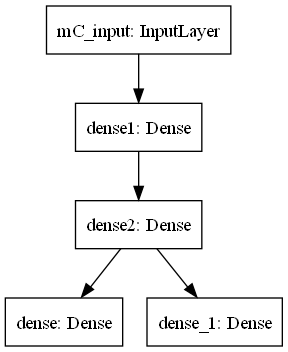

In [18]:
plot_model(vae.encoder)


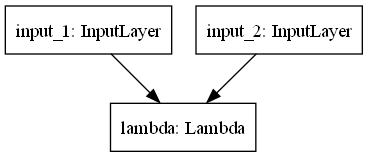

In [18]:
plot_model(vae.sampler)

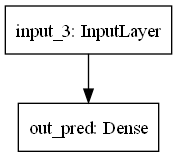

In [19]:
plot_model(vae.decoder)

In [20]:
vae.model_summary()

Encoder Summary:
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mC_input (InputLayer)           [(None, 824)]        0                                            
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 128)          105600      mC_input[0][0]                   
__________________________________________________________________________________________________
dense2 (Dense)                  (None, 64)           8256        dense1[0][0]                     
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           2080        dense2[0][0]                     
___________________________________________________________________________